# __Modelo de función: regresión lineal múltiple__

In [ ]:
#Apretar B para agregar una celda abajo, A para agregar una celda arriba, y D dos veces consecutivas para eliminar una celda.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

In [4]:
archivos = ['1990','1991','1992','1993','1994','1995','1996','2001','2002','2003','2004','2005','2006','2007','2008']

otpxOrigin = []

for year in archivos:
    with open('diccOTPPorOrigin'+year+'.txt', 'rb') as f:
        temp = pickle.load(f)
        otpxOrigin.append(temp)

In [5]:
df = pd.read_csv('../data/airports.csv')

In [14]:
keys = df['iata'].tolist()
lats = df['lat'].tolist()
longs = df['long'].tolist()

In [19]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))

In [20]:
print(BBox)

(-176.6460306, 145.621384, 7.367222, 71.2854475)


In [ ]:
BBox = ((-177,   146,      
         7, 72))

In [21]:
ruh_m = plt.imread('USmap.png')

In [35]:
ss = np.random.randint(low=1,high=10,size=len(lats))

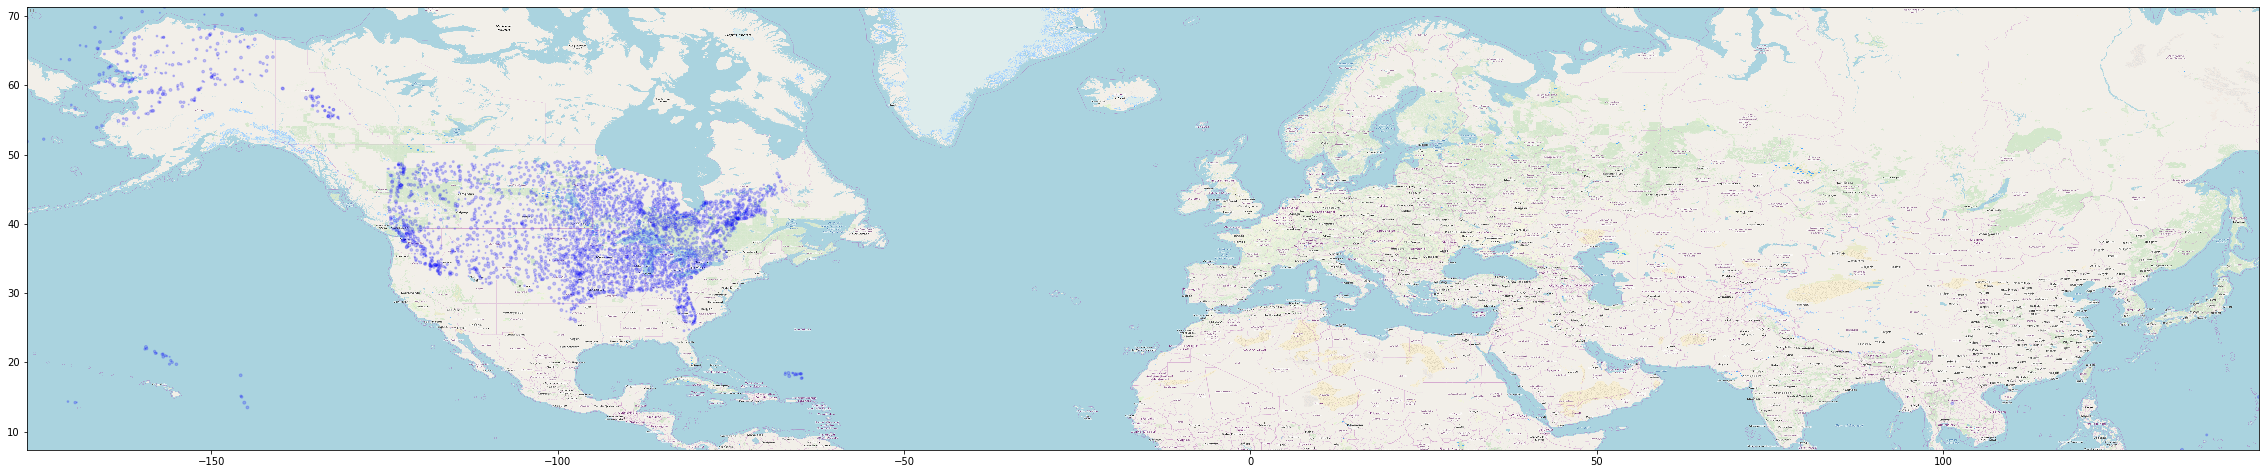

In [36]:
fig, ax = plt.subplots(figsize = (40,25))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='r', s=ss)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox)